<a href="https://colab.research.google.com/github/MariaFernandaReyesLopez/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNIVERSIDAD TECNOLOGICA DE TULANCINGO

* **Alumno:** Reyes Lopez Maria Fernanda
* **Matrícula:** 1718110411
* **Carrera y grupo:** IDGS 91
* **Fecha:** 05-DIC-21
* **Actividad:** 4.2 Métricas de evaluación

# Importar librerias

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split # Dividir dataset en train y test 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns = 8 # Indicar cuantas columnas nos mostrará

# Importar el dataset

In [51]:
df = pd.read_csv("titanic.csv")

# Analizar el dataframe

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [53]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [54]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Crear una columna (Features Engineering)

In [55]:
df['Male'] = df['Sex'] == 'male'

In [56]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [57]:
df['Male'].sum() # 573 Hombres en el barco, los valores booleanos se pueden sumar True = 1 y False = 0

573

# Scatter plot 

Text(0, 0.5, 'Age')

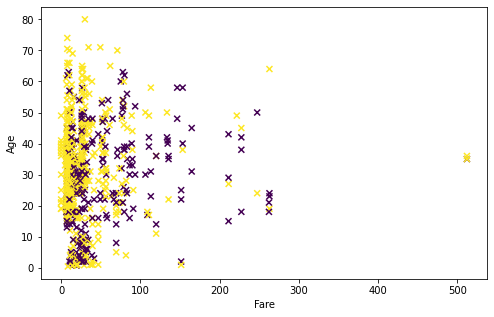

In [58]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'], df['Age'], c=df['Male'], marker='x') # Color dependiendo de una clase con parametro "c" y con marker cambiamos el diseño
plt.xlabel("Fare")
plt.ylabel("Age")

# Separar características y el objetivo

In [59]:
X = df[['Pclass','Age', 'Siblings/Spouses', 'Parents/Children', 'Fare', 'Male']].values # .values Convierte los datos a un arreglo
y = df['Survived'].values

In [60]:
y # Vemos si una persona sobrevivió o no

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

# Configurar el modelo

In [61]:
model = LogisticRegression()

# Dividir en train y test

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

# Entrenar

In [63]:
model.fit(X_train, y_train)

LogisticRegression()

# Predicciones

In [64]:
y_pred = model.predict(X_test)

# Analizar las predicciones

In [65]:
X_test.shape

(178, 6)

In [66]:
X_test[0:3] # Al colocar los dos puntos nos muestra todas las filas o columnas

array([[3, 19.0, 0, 0, 7.8958, True],
       [3, 22.0, 0, 0, 7.8958, True],
       [1, 47.0, 1, 1, 52.5542, False]], dtype=object)

In [67]:
y_test[:] # Datos esperados

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [68]:
y_pred[:] # Datos que ha devuelto nuestro modelo

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1])

In [69]:
X_test[11]

array([3, 32.0, 0, 0, 7.8542, True], dtype=object)

In [70]:
y_test[11]

1

In [71]:
y_pred[11] # La razon del resultado es debido a la probabilidad, clasfica de acuerdo a una probabilidad > 0.5

0

# Probabilidad

In [72]:
model.predict_proba(X_test)[11,0] # Probabilidad de que la persona no sobrevivió

0.9103756228533388

In [73]:
model.predict_proba(X_test)[11,1] # Probabilidad de que la persona sobrevivió

0.08962437714666113

In [74]:
y.shape

(887,)

In [75]:
y.sum() # Personas que sobrevivieron, la suma de los 1

342

In [76]:
y.shape - y.sum() # Personas que no sobrevivieron

array([545])

# Metricas

## Accuracy 

Accuracy = numero de predicciones correctas / total de predicciones

In [77]:
y_pred == y_test # True significa que la prediccion fue igual a la que esperaba y False nos indica que fue incorrecta

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,

In [78]:
(y_pred == y_test).sum() # Como suma los True tenemos como resultado 145 correctos

145

In [79]:
y_test.shape # Al comparar vemos que tenemos 145 correctos de 178

(178,)

## Calculo Accuracy

In [80]:
accuracy = (y_pred == y_test).sum() / y_test.shape # Tenemos un modelo de 0.81 de exactitud al realizar las predicciones
accuracy

array([0.81460674])

# Matriz de confusión

In [81]:
confusion_matrix(y_test, y_pred)

array([[95, 15],
       [18, 50]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


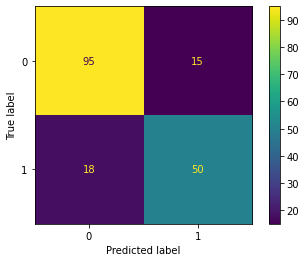

In [82]:
plot_confusion_matrix(model,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


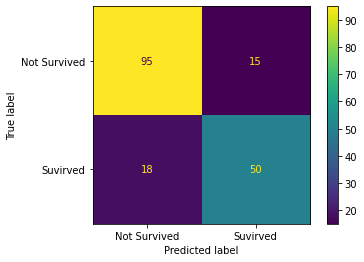

In [83]:
labels = ["Not Survived", "Suvirved"]
plot_confusion_matrix(model,X_test,y_test,display_labels=labels) # Con el parametro display_labels cambiamos las labels 

In [84]:
labels = ["No sobrevivió", "Sobrevivió"]
print(classification_report(y_test, y_pred, target_names=labels)) # Con el parametro target_names cambiamos las labels 

               precision    recall  f1-score   support

No sobrevivió       0.84      0.86      0.85       110
   Sobrevivió       0.77      0.74      0.75        68

     accuracy                           0.81       178
    macro avg       0.80      0.80      0.80       178
 weighted avg       0.81      0.81      0.81       178



# Accuracy de la Confusion Matrix

Accuracy = suma de predicciones correctas / total de predicciones

In [85]:
accuracy = (95 + 50) / (95 + 50 + 15 + 18)
accuracy

0.8146067415730337

# Precision

¿Qué proporción de identificaciones positivas fue realmente correcta? 

presicion = positivos predichos correctamente / total predicciones positivas

In [86]:
precision = 50 / (50 + 15)
precision

0.7692307692307693

# Recall 

¿Qué proporción de positivos reales se identifico correctamente?

recall = True positive / ( True positive + False Negative) 

In [87]:
recall = 50 / (50 + 18)
recall

0.7352941176470589

# F1 Score

Es el promedio de precision y recall

f1_score = 2 * ((precision * recall) / (precision + recall))

In [88]:
f1 = 2 * ((precision * recall) / (precision + recall))
f1

0.7518796992481205

# SKLearn Metrics

In [89]:
print("Accuracy: {} : {}".format(accuracy, accuracy_score(y_test,y_pred)))

Accuracy: 0.8146067415730337 : 0.8146067415730337


In [90]:
print("Precision: {} : {}".format(precision, precision_score(y_test,y_pred)))

Precision: 0.7692307692307693 : 0.7692307692307693


In [91]:
print("Recall: {} : {}".format(recall, recall_score(y_test,y_pred)))

Recall: 0.7352941176470589 : 0.7352941176470589


In [92]:
print("F1 Score: {} : {}".format(f1, f1_score(y_test,y_pred)))

F1 Score: 0.7518796992481205 : 0.7518796992481205


In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



# Cambiar el umbral (Threshold)

In [94]:
y_pred = model.predict_proba(X_test)[:,1] > 0.60 # La persona sobrevivio solo cuando la probabilidad de 1 sea mayor a 0.60

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        68

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178



# Conclusión

Al realizar esta actividad comprendí y entendí más acerca de la importancia de analizar nuestro modelo y no basarnos unicamente en que la precisión es alta. Ya que muy probablemente debamos cambiar Features al entrenar nuestro modelo o el Threshold, pero antes de hacerlo debemos asegurandonos de que el modelo nos funcione para lo que deseamos o queramos.
